# Duch soils

The properties of Dutch soils have been published by

Heinen M., G.Bakker and J.H.M.Wösten (2020) Waterretentie- en doorlatendheidskarakteristieken van boven- en ondergronden in Nederland: de Staringreeks; Update 2018. Wageningen, Wageningen Environmental Research, Rapport 2978, 78 blz.; 6 fig.; 4 tab.; 22 ref. ISSN 1566-7197.

The tables with the soil data are imported and allow compuation of suction, moisture and hydraulic conductivity relations for the most important Dutch soils, the so-called Staringreeks. The Staring Series defines 18 upper soils and 18 lower soils.

@TO Aug. 2026

In [1]:
import sys
import os

root = os.getcwd()
expected = "Munsflow_H2O_1995" # Works if VScode was started in the project directory
if not root.endswith(expected):
    raise RuntimeError(f"Unexpected project root: {root}")

import numpy as np              # noqa
import matplotlib.pyplot as plt # noqa
from itertools import cycle     # noqa
import etc                      # noqa

dirs = etc.Dirs()

# Make sure the subdirectories .src etc are found. Should not be necessary
sys.path.insert(0, os.getcwd())  # is line in .vscode/settings.json {"jupyter.notebookFileRoot": "${workspaceFolder}"}

print(os.getcwd())

/Users/Theo/GRWMODELS/python/tools/Stromingen/Munsflow_H2O_1995


In [2]:
from src import NL_soils as sNL, US_soils as sUS

# Dutch soil properties

The properties of the Staringreeks, the series of Dutch soils, are read into a pandas DataFrame and stored as class attribute data in the Soil class, which is instantatied as with the class method load_soils(wbook). The paramters are the Van Genughten parameters so that moisture, suction and conductivities for each soil can be computed from them.

In [3]:
wbook = os.path.join(dirs.data, 'NL_VG_soilprops.xlsx')
sNL.Soil.load_soils(wbook) # load once
sNL.Soil.pretty_data()
sand_b = sNL.Soil("O01")
sand_o = sNL.Soil("B01")

     Hoofdsoort                                     Omschrijving  theta_r  theta_s   alpha      n  lambda      Ks                 Leem   Lutum      os       M50   N1  N2
code                                                                                                                                                                     
B01        Zand           leemarm, zeer fijn tot matig fijn zand     0.02    0.427  0.0217  1.735   0.981   31.23                 0-10     NaN    0-15   105-210   32   7
B02        Zand        zwak lemig, zeer fijn tot matig fijn zand     0.02    0.434  0.0216  1.349   7.202   83.24                10-18     NaN    0-15   105-210   27  11
B03        Zand       sterk lemig, zeer fijn tot matig fijn zand     0.02    0.443  0.0150  1.505   0.139   19.08                18-33     NaN    0-15   105-210   14   4
B04        Zand  zeer sterk lemig, zeer fijn tot matig fijn zand     0.02    0.462  0.0149  1.397   0.295   34.88                33-50     NaN    0-15

# The Van Genughten parameters of the "Staringreeks"

The Staringreeks are stanard Dutch soils, containing 18 upper soils and 18 under soils. Many samples have been collected and were analyzed over a time-span of many decades. The results have been published. The last update 2018, contains the optimized Van Genughten parametes that describe the soil's properties when unsaturated.

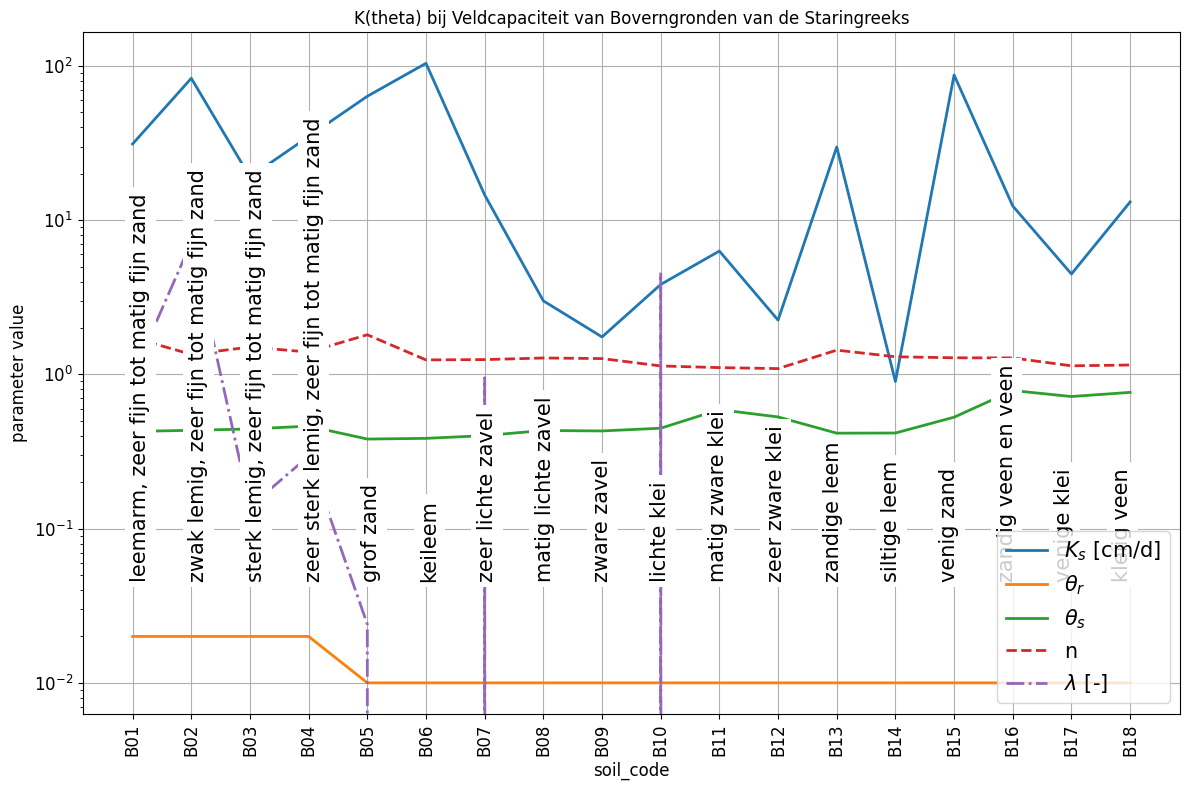

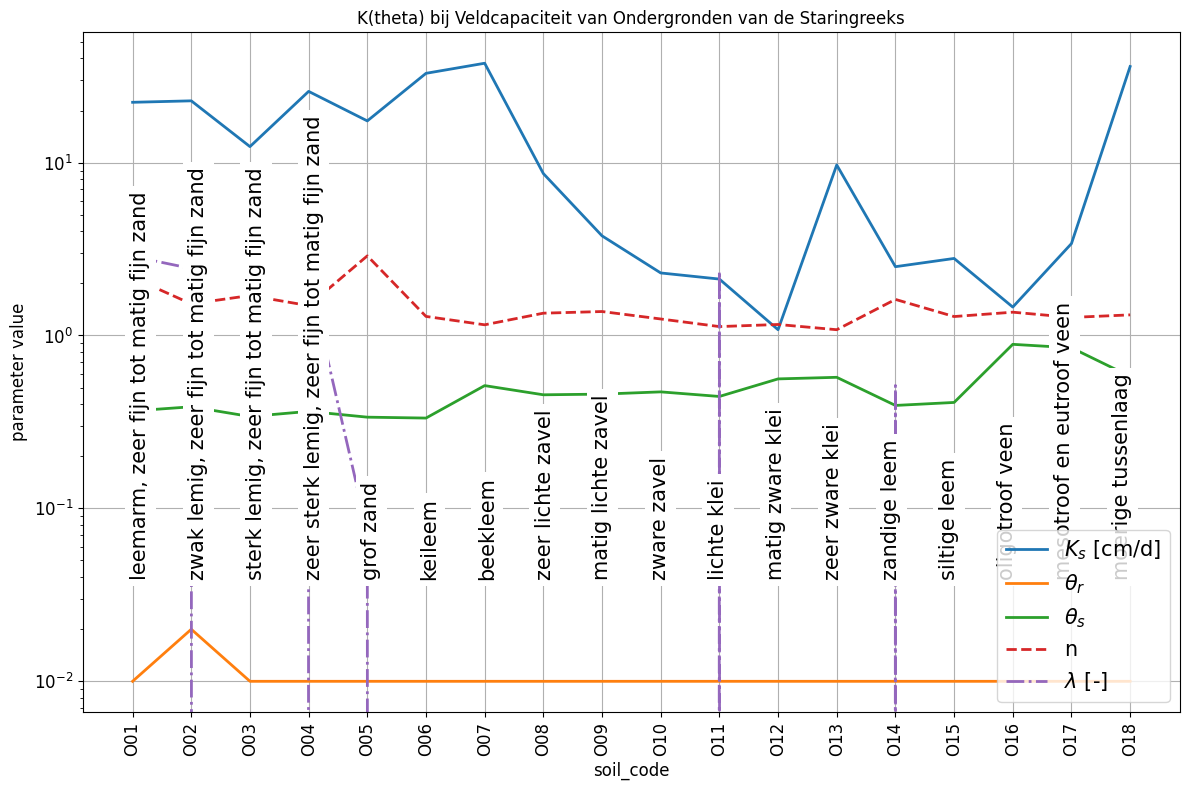

In [4]:
# %% Soil parameters
    
for BO in ['Boverngronden', 'Ondergronden']:
    title = f'K(theta) bij Veldcapaciteit van {BO} van de Staringreeks'
    ax = etc.newfig(title, 'soil_code', 'parameter value', yscale='log')

    soil_codes = [c for c in sNL.Soil.data.index if c.startswith(BO[0])]

    idx = soil_codes
    ax.plot(idx, sNL.Soil.data.loc[soil_codes, 'Ks'], lw=2, label=r'$K_s$ [cm/d]')
    ax.plot(idx, sNL.Soil.data.loc[soil_codes, 'theta_r'], lw=2, label=r'$\theta_r$')
    ax.plot(idx, sNL.Soil.data.loc[soil_codes, 'theta_s'], lw=2, label=r'$\theta_s$')        
    ax.plot(idx, sNL.Soil.data.loc[soil_codes, 'n'], '--', lw=2, label='n')
    ax.plot(idx, sNL.Soil.data.loc[soil_codes, 'lambda'], '-.', lw=2, label=r'$\lambda$ [-]')
    
    for i, code in enumerate(soil_codes):
        soil = sNL.Soil(code)

        ax.text((i + 1) / (len(soil_codes) + 1), 0.2,
                soil.props['Omschrijving'], ha='center', rotation=90, fontsize=15, zorder=5,
                bbox=dict(facecolor='white',
                        alpha=1,
                        edgecolor='none'),
                transform=ax.transAxes)
        
    ax.legend(fontsize=15, loc='lower right')

    #ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.xticks(rotation=90, ha="center")
    plt.tight_layout()


# Show field capacities and wilting point for all Dutch soils (Ondergronden and Bovengronden)

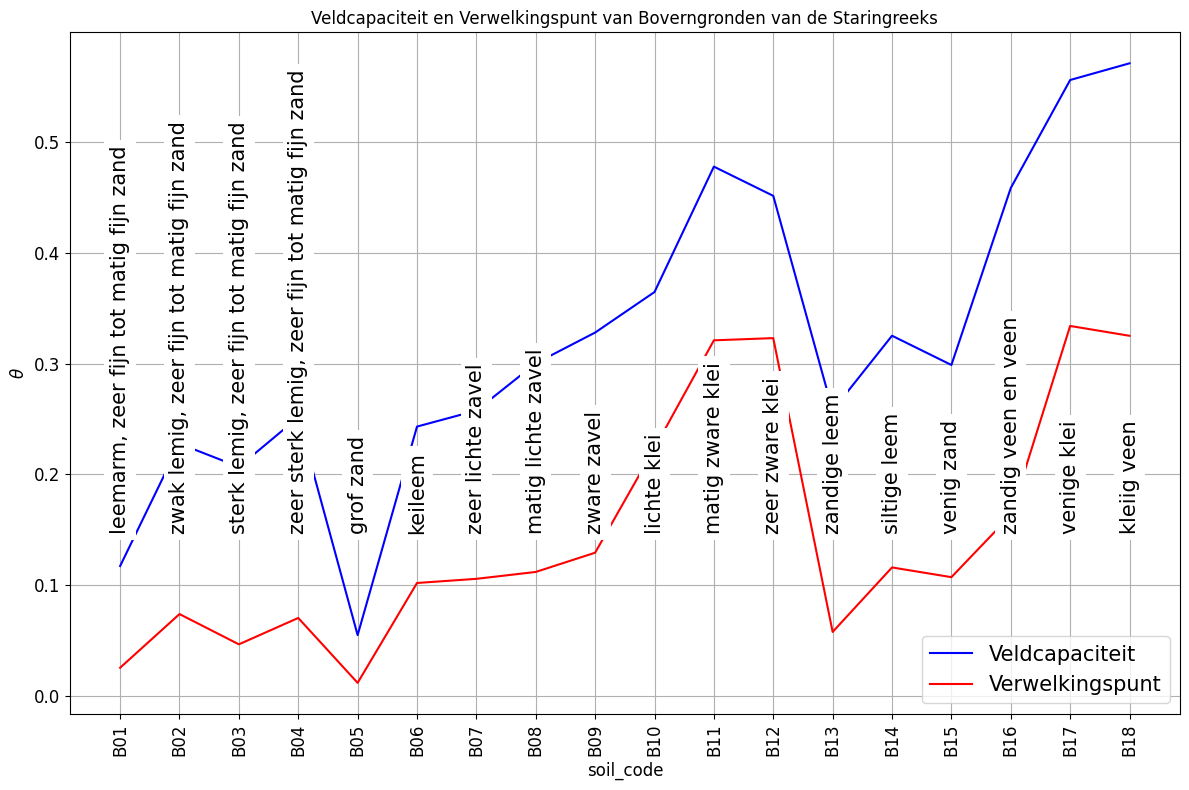

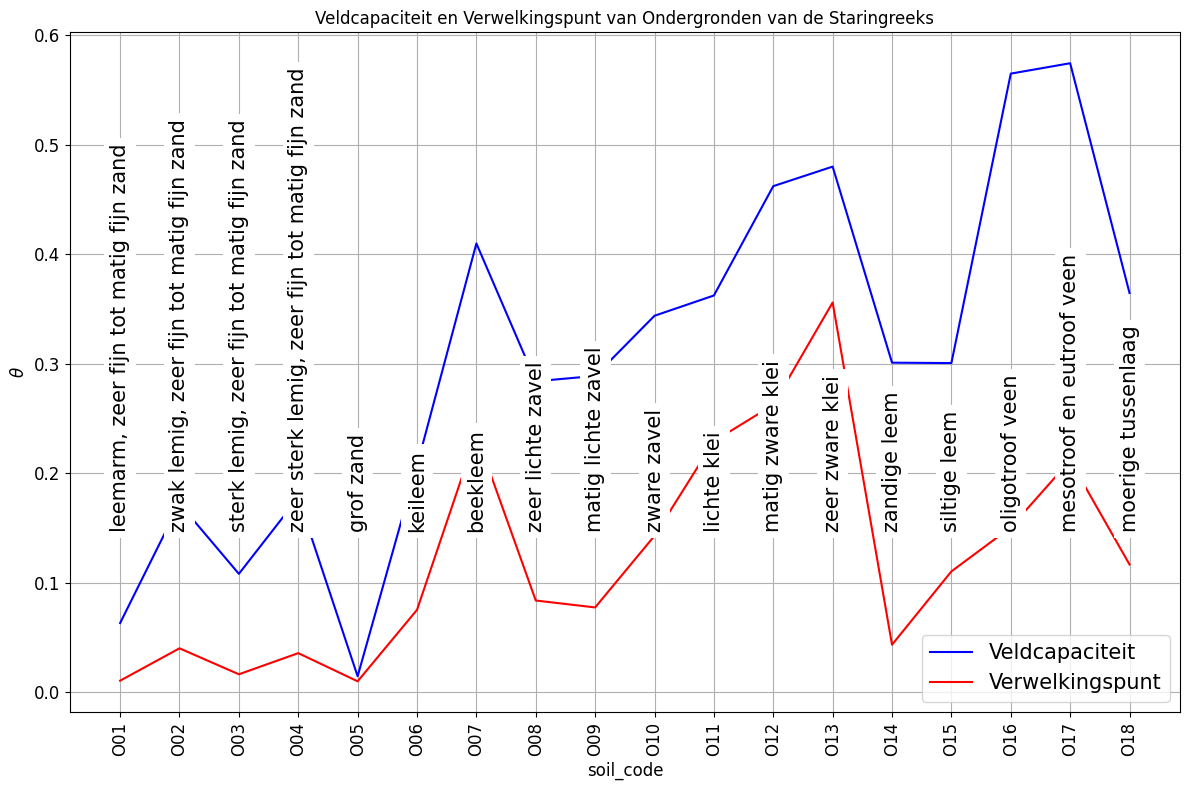

In [5]:
# %% Show field capacities and wilting points
    
for BO in ['Boverngronden', 'Ondergronden']:
    title = f'Veldcapaciteit en Verwelkingspunt van {BO} van de Staringreeks'
    ax = etc.newfig(title, 'soil_code', r'$\theta$')

    fcs, wps, codes = [], [], []
    for code in [c for c in sNL.Soil.data.index if c.startswith(BO[0])]:
        soil = sNL.Soil(code)
        codes.append(code)
        fcs.append(soil.theta_fc(pF=2.5))
        wps.append(soil.theta_wp(pF=4.2))
        
        i = int(code[1:])
        ax.text(int(code[1:]) - 1, 0.15,
                soil.props['Omschrijving'], ha='center', rotation=90, fontsize=15, zorder=5,
                bbox=dict(facecolor='white',
                        alpha=1,
                        edgecolor='none'))

    ax.plot(codes, np.array(fcs), 'b', label='Veldcapaciteit')
    ax.plot(codes, np.array(wps), 'r', label='Verwelkingspunt')
    ax.legend(fontsize=15, loc='lower right')

    #ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.xticks(rotation=90, ha="center")
    plt.tight_layout()

# Show $K(\theta)$ at field capacity (pF = 2.5)

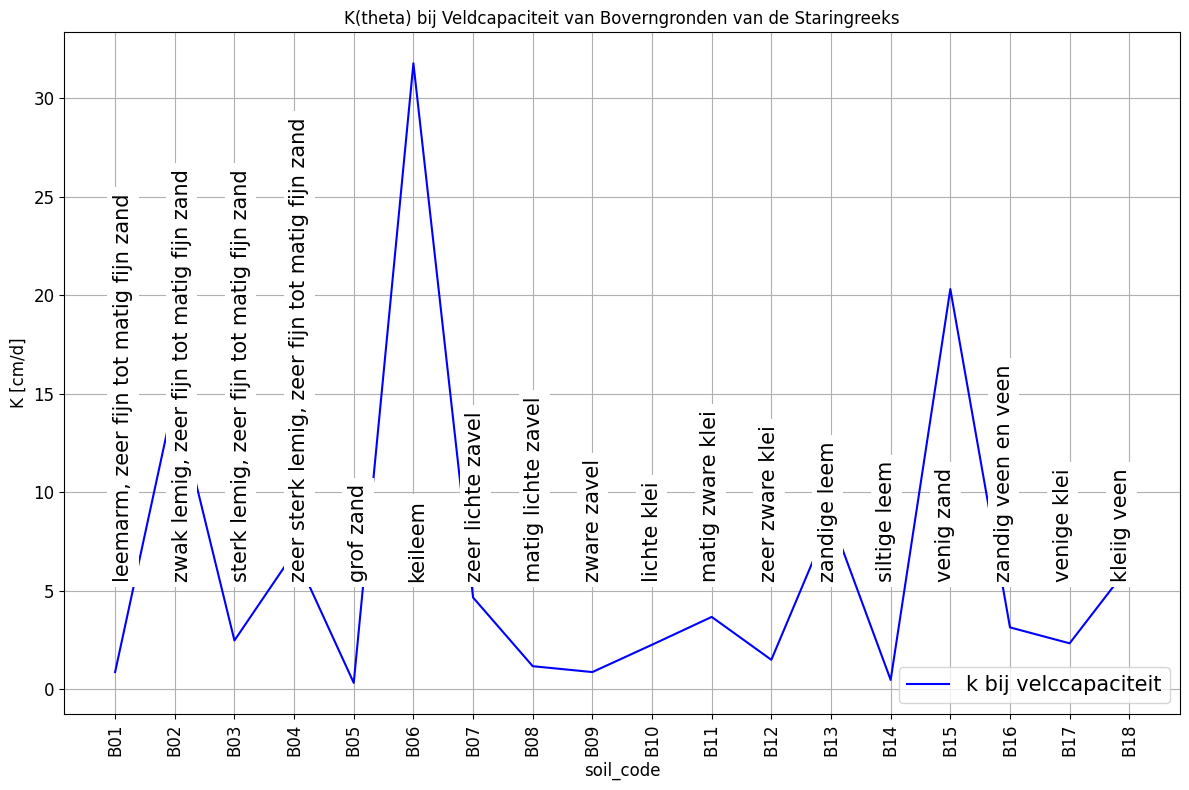

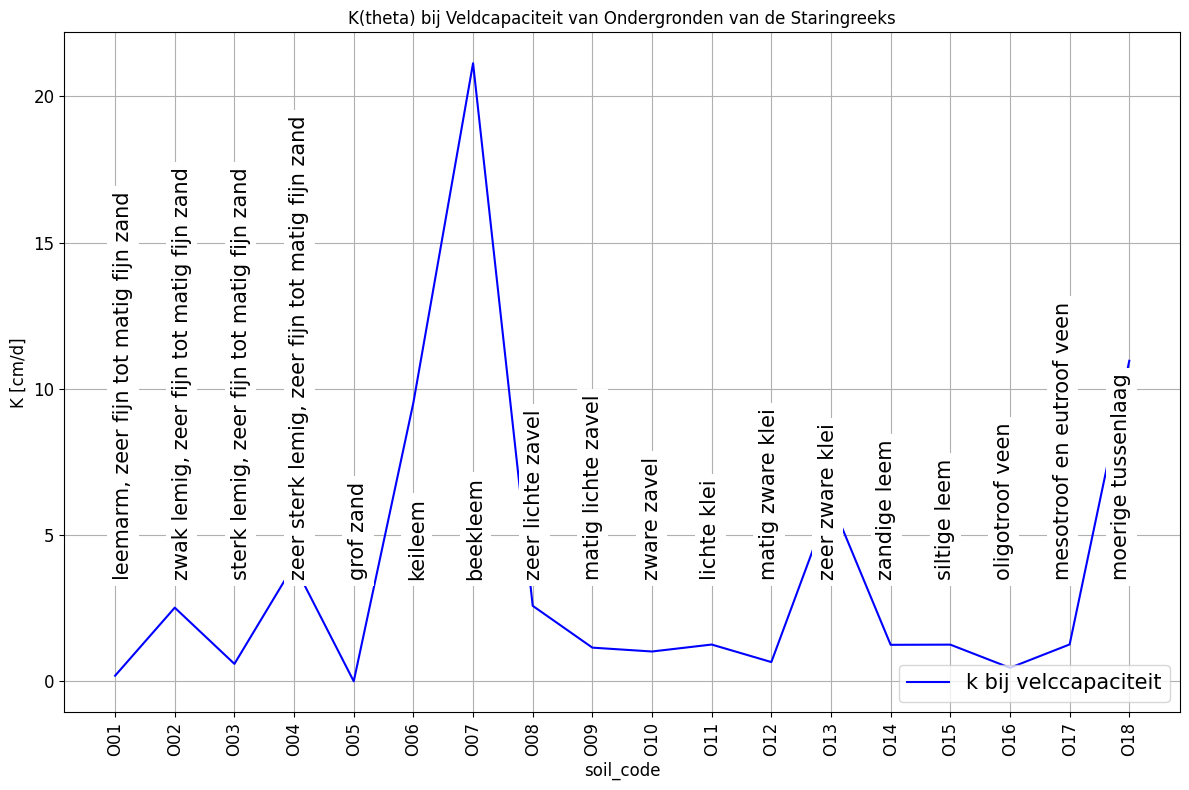

In [6]:
# %% K(theta) bij veldcapaciteit (pF=2.5)

for BO in ['Boverngronden', 'Ondergronden']:
    title = f'K(theta) bij Veldcapaciteit van {BO} van de Staringreeks'
    ax = etc.newfig(title, 'soil_code', 'K [cm/d]')

    soil_codes = [c for c in sNL.Soil.data.index if c.startswith(BO[0])]
    
    kvalues, codes = [], []
    
    for i, code in enumerate(soil_codes):
        soil = sNL.Soil(code)
        codes.append(code)
        kvalues.append(soil.K_fr_theta(soil.theta_fc(pF=2.5)))
                    
        ax.text((i + 1) / (len(soil_codes) + 1), 0.2,
                soil.props['Omschrijving'], ha='center', rotation=90, fontsize=15, zorder=5,
                bbox=dict(facecolor='white',
                        alpha=1,
                        edgecolor='none'),
                transform=ax.transAxes)
        

    ax.plot(codes, np.array(kvalues), 'b', label='k bij velccapaciteit')    
    ax.legend(fontsize=15, loc='lower right')

    #ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.xticks(rotation=90, ha="center")
    plt.tight_layout()

# Get soil_codes of sands of "Benedengronden"

In [7]:
# %% Get soil_codes of sands of "Benedengronden"

soil_codes = sNL.Soil.data.index[sNL.Soil.data.loc[:, 'Hoofdsoort'] == 'Zand']
soil_codes = [code for code in soil_codes if code.startswith('B')]
print(soil_codes)

['B01', 'B02', 'B03', 'B04', 'B05', 'B06']


# Showing the $\psi(\theta)$ relation for all soils, each with its field capacity and wilting point.

$\psi(\theta)$ is verified by also showing (as dots) $\psi(\theta(\psi))$, which must give the same points if $\\psi(\theta)$ and $\theta(\psi)$ have been correctly implemented.

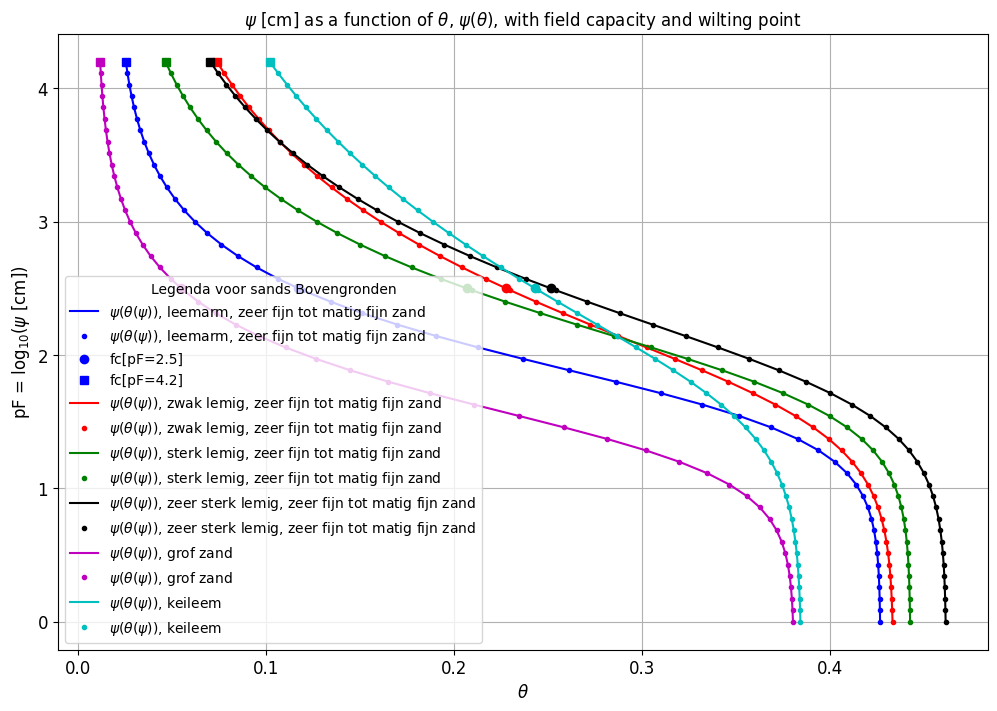

In [ ]:

# %% psi(theta)

title = r"$\psi$ [cm] as a function of $\theta$, $\psi(\theta)$, with field capacity and wilting point"
ax=etc.newfig(title, r'$\theta$', r'pF = log$_{10}(\psi$ [cm])', yscale='linear')
    
clrs = cycle("brgkmcy")
for code in soil_codes:
    clr = next(clrs)
    soil = sNL.Soil(code)
    psi = soil.psispace()
    theta = soil.theta_fr_psi(psi)
    soil_nm = soil.props['Omschrijving']
    
    pF  = np.log10(psi)
    pF1 = np.log10(soil.psi_fr_theta(theta))
    ax.plot(theta, pF,  '-', color=clr, label=fr"$\psi(\theta(\psi))$, {soil_nm}")
    ax.plot(theta, pF1, '.', color=clr, label=fr"$\psi(\theta(\psi))$, {soil_nm}")
    
    # Field capacity and wilting point
    pF_fc, pF_wp = 2.5, 4.2
    lbl1 = f"fc[pF={pF_fc}]" if code.endswith('01') else ""
    lbl2 = f"fc[pF={pF_wp}]" if code.endswith('01') else ""
    
    # Plot field_capacity and wilting_point
    ax.plot(soil.theta_fc(pF=pF_fc), pF_fc, 'o', color=clr, label=lbl1)
    ax.plot(soil.theta_wp(pF=pF_wp), pF_wp, 's', color=clr, label=lbl2)
    
ax.legend(title="Legenda voor sands Bovengronden")

# Show the moisture capacity $d\theta / d\psi$ for all selected soils.

dpsi_dtheta * dtheta_dpsisoil_nm, leemarm, zeer fijn tot matig fijn zand
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
dpsi_dtheta * dtheta_dpsisoil_nm, zwak lemig, zeer fijn tot matig fijn zand
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
dpsi_dtheta * dtheta_dpsisoil_nm, sterk lemig, zeer fijn tot matig fijn zand
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
dpsi_dtheta * dtheta_dpsisoil_nm, zeer sterk lemig, zeer fijn tot matig fijn zand
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
dpsi_dtheta * dtheta_dpsisoil_nm, grof zand
 [1. 1. 1. 1. 1. 1. 1. 1. 1.

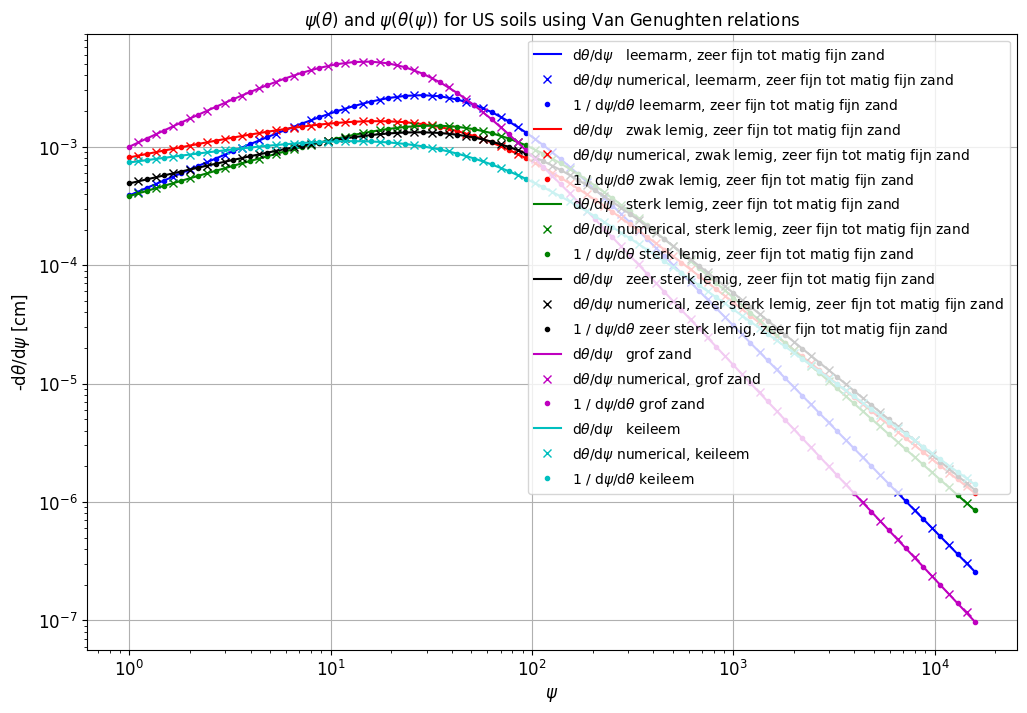

In [ ]:
# %% Show dtheta/dpsi for all sands.

title = r"$\psi(\theta)$ and $\psi(\theta(\psi))$ for US soils using Van Genughten relations"
ax = etc.newfig(title, r'$\psi$', r'-d$\theta$/d$\psi$ [cm]',
                xscale='log', yscale='log')    

clrs = cycle('brgkmc')
for soil_code in soil_codes:
    soil = sNL.Soil(soil_code)
    soil_nm = soil.props['Omschrijving']
    psi = soil.psispace()
    theta = soil.theta_fr_psi(psi)     
    clr = next(clrs)
    ax.plot(psi, -soil.dtheta_dpsi(psi), '-', color=clr, label=fr'd$\theta$/d$\psi$   {soil_nm}')
    
    # Numeric approximation
    dtheta_dpsi = np.diff(theta) / np.diff(psi)
    psi_mid = 0.5 * (psi[1:] + psi[:-1])
    ax.plot(psi_mid, -dtheta_dpsi,'x', color=clr, label=fr'd$\theta$/d$\psi$ numerical, {soil_nm}')
    
    ax.plot(psi, -1 / soil.dpsi_dtheta(theta),'.', color=clr, label=fr'1 / d$\psi$/d$\theta$ {soil_nm}')

    print(f"dpsi_dtheta * dtheta_dpsisoil_nm, {soil_nm}\n",
          soil.dpsi_dtheta(theta) * soil.dtheta_dpsi(psi))

ax.legend(loc='upper right')

# Check that $S$ can be computed equally well from $\psi$ as from $\theta$

Comppute $S(\psi)$ from $\psi$

$$ S\left(\psi\right)=\left(1+\left(\alpha\psi\right)^{n}\right)^{-m} $$

Compute $S(\theta)$ from $\theta(\psi)$

$$ S\left(\theta\right)=\left(1+\left(\alpha\psi(\theta)\right)^{n}\right)^{-m} $$

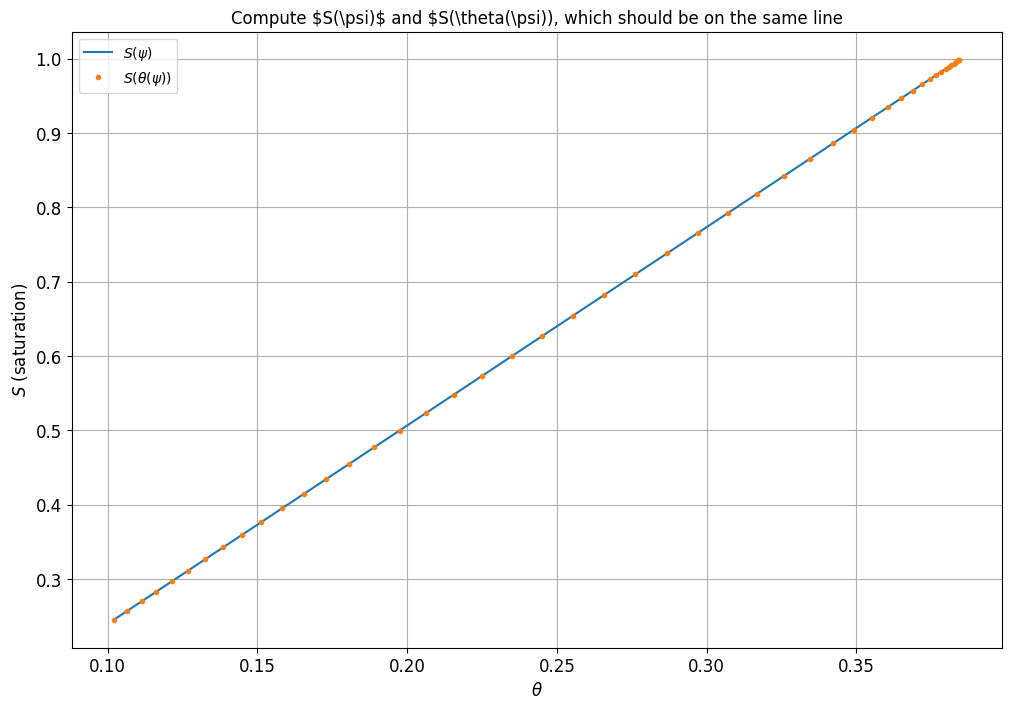

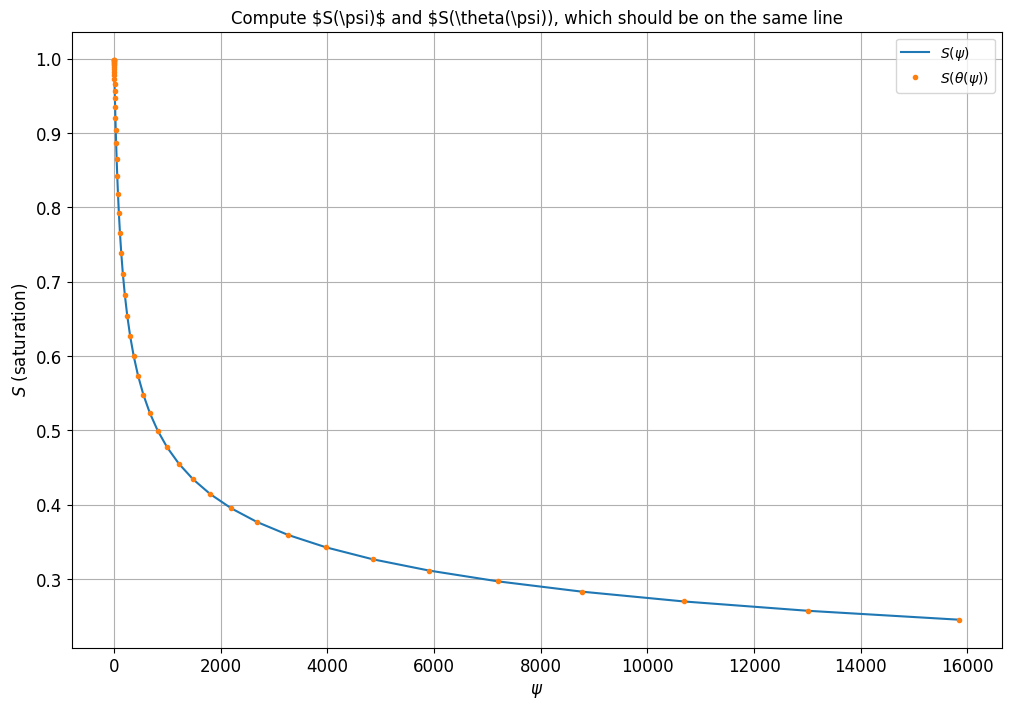

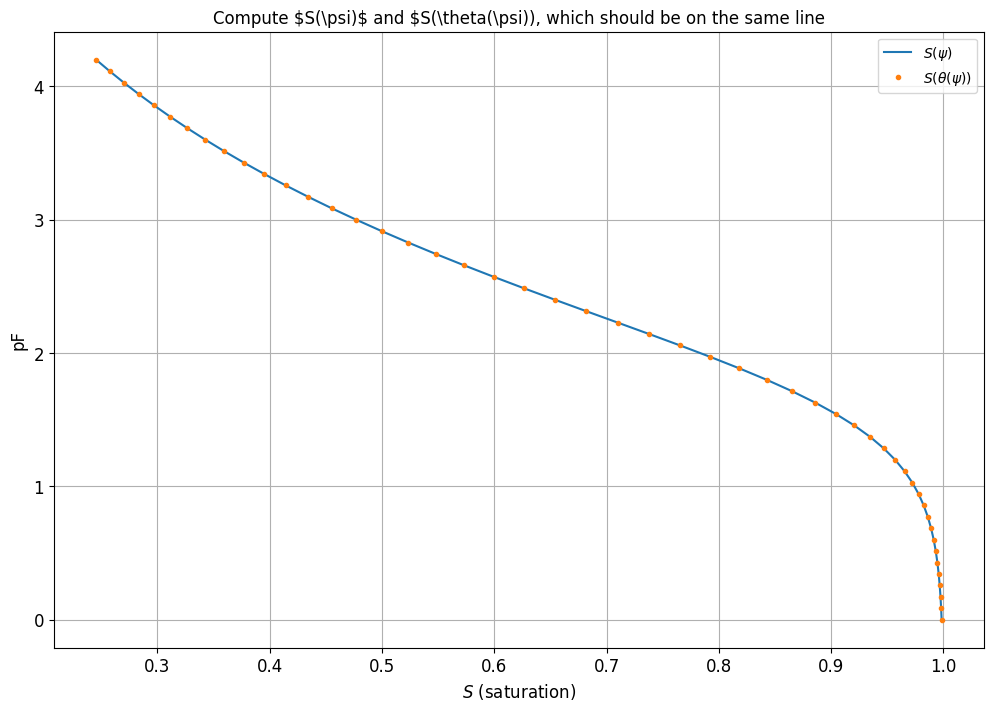

In [10]:
psi   = np.logspace(0, 4.2)
theta = soil.theta_fr_psi(psi)

S_psi   = soil.S_fr_psi(psi)
S_theta = soil.S_fr_theta(theta)

title = r'Compute $S(\psi)$ and $S(\theta(\psi)), which should be on the same line'
ax = etc.newfig(title, r'$\theta$', r'$S$ (saturation)')

ax.plot(theta, S_psi,   '-', label=r'$S(\psi)$')
ax.plot(theta, S_theta, '.', label=r'$S(\theta(\psi))$')

ax.legend(loc='upper left')

title = r'Compute $S(\psi)$ and $S(\theta(\psi)), which should be on the same line'
ax = etc.newfig(title, r'$\psi$', r'$S$ (saturation)')

ax.plot(psi, S_psi,   '-', label=r'$S(\psi)$')
ax.plot(psi, S_theta, '.', label=r'$S(\theta(\psi))$')

ax.legend(loc='upper right')


title = r'Compute $S(\psi)$ and $S(\theta(\psi)), which should be on the same line'
ax = etc.newfig(title, r'$S$ (saturation)', r'pF')

pF = np.log10(psi)
ax.plot(S_psi,   pF, '-', label=r'$S(\psi)$')
ax.plot(S_theta, pF, '.', label=r'$S(\theta(\psi))$')

ax.legend(loc='upper right')

# Checking that $dS/d\psi \times d\psi/dS = 1$

There was a bug in the module. This is the test. The code computes both explicitly. After which the values are compared with the results from the module/class Soil(SoilBase(ABC))

In [19]:
import numpy as np

# Parameters
soil = sNL.Soil('O01')
alpha, n, m = soil.props['alpha'], soil.props['n'], soil.props['m']

print(f"checking m = 1 - 1 / n:  {m == 1 - 1/n}   # Van Genuchten relation")

# Define S(psi)
def S_fr_psi(psi):
    return (1 + (alpha * psi)**n)**(-m)

# dS/dpsi
def dS_dpsi(psi):
    return -alpha * n * m * (1 + (alpha * psi)**n)**(-m-1) * (alpha * psi)**(n-1)

# psi(S)
def psi_of_S(S):
    return (S**(-1/m) - 1)**(1/n) / alpha

# dpsi/dS
def dpsi_dS(S):
    return -(1/(alpha*n*m)) * (S**(-1/m) - 1)**(1/n - 1) * S**(-1/m - 1)

# Test values
print("\nCheck the cahtGPT program\n")

psi = soil.psispace(6)  # avoid zero to prevent singularities

print("\nCompare S_fr_psi, soil.S_fr_psi\n")

S1 =      S_fr_psi(psi)    
S2 = soil.S_fr_psi(psi)

print(S1)
print(S2)

print("\nCompare dpsi_dS, soil.dpsi_dS\n")

dpdS1 =      dpsi_dS(S1)
dpdS2 = soil.dpsi_dS(S1)

print(dpdS1)
print(dpdS2)

print("\nCompare dS_dpsi, soil.dS_dpsi\n")

dSdp1 =      dS_dpsi(psi)
dSdp2 = soil.dS_dpsi(psi)

print(dSdp1)
print(dSdp2)

print("\nCompare dpsi_dS * dS_dpsi\n")
    
lhs1 =      dpsi_dS(S1) *      dS_dpsi(psi)
lhs2 = soil.dpsi_dS(S1) * soil.dS_dpsi(psi)

print(lhs1)
print(lhs2)



checking m = 1 - 1 / n:  True   # Van Genuchten relation

Check the cahtGPT program


Compare S_fr_psi, soil.S_fr_psi

[0.99992986 0.99542798 0.78693012 0.14177307 0.01516463 0.00159958]
[0.99992986 0.99542798 0.78693012 0.14177307 0.01516463 0.00159958]

Compare dpsi_dS, soil.dpsi_dS

[-6.59167651e+03 -7.04174509e+02 -1.45437104e+02 -2.06281036e+03
 -1.29947556e+05 -8.51953787e+06]
[-6.59167651e+03 -7.04174509e+02 -1.45437104e+02 -2.06281036e+03
 -1.29947556e+05 -8.51953787e+06]

Compare dS_dpsi, soil.dS_dpsi

[-1.51706474e-04 -1.42010253e-03 -6.87582449e-03 -4.84775536e-04
 -7.69541211e-06 -1.17377259e-07]
[-1.51706474e-04 -1.42010253e-03 -6.87582449e-03 -4.84775536e-04
 -7.69541211e-06 -1.17377259e-07]

Compare dpsi_dS * dS_dpsi

[1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1.]


# Show $d\psi/dS \times dS/d\theta$ and $d\psi/d\theta$

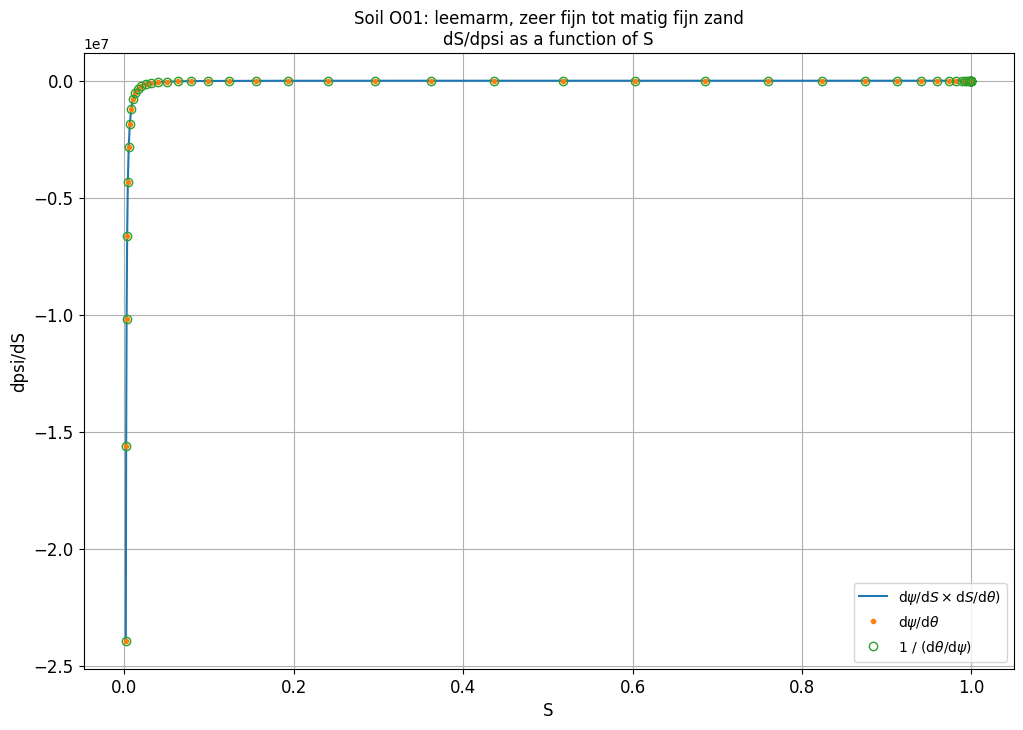

In [20]:
#soil.dpsi_dtheta(theta) * soil.dtheta_dpsi(psi)
psi = soil.psispace()
S   = soil.S_fr_psi(psi)
theta = soil.theta_fr_S(S)

soil_nm = soil.props['Omschrijving']
ttl = f"Soil {soil.code}: {soil_nm}\n"
title = ttl + "dS/dpsi as a function of S"
ax = etc.newfig(title, 'S', 'dpsi/dS')

ax.plot(S, soil.dpsi_dS(S) * soil.dS_dtheta(theta), '-', label=r'd$\psi$/d$S \times $d$S$/d$\theta$)')
ax.plot(S, soil.dpsi_dtheta(theta), '.', label=r'd$\psi$/d$\theta$')
ax.plot(S, 1 / soil.dtheta_dpsi(psi), 'o', mfc='none', label=r'1 / (d$\theta$/d$\psi$)')


ax.legend()

# $K(\theta)$ and $dK/d\theta$

Below the hydraulic conductivity $K(\theta)$ vs $\theta$ and $dK(\thetea)/d\theta$is shown for all Dutch soils.

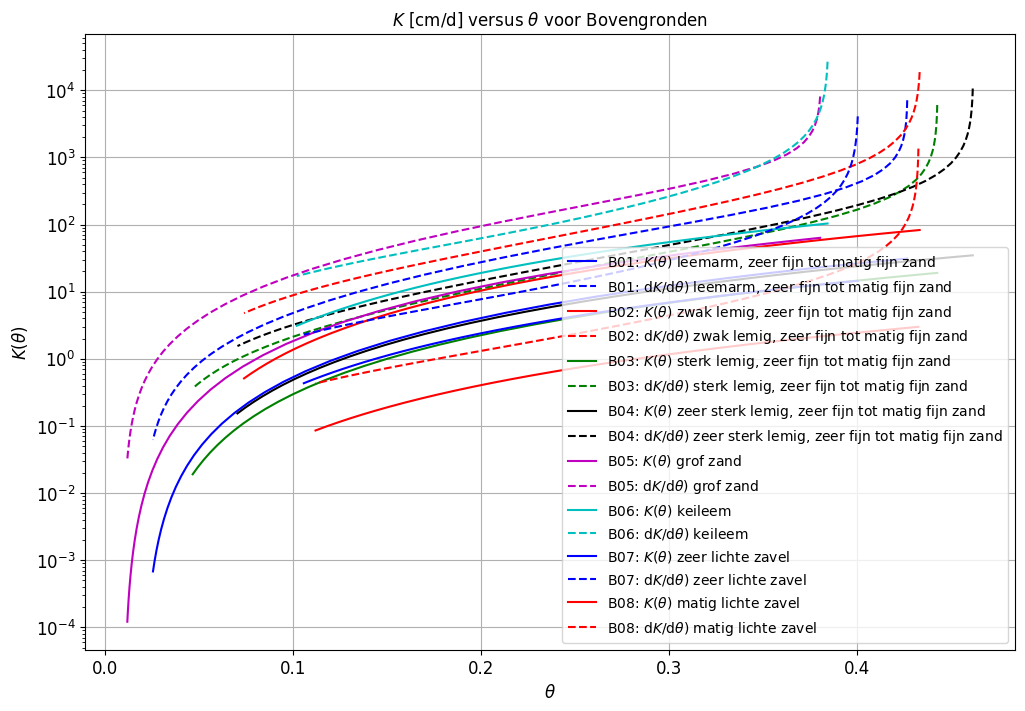

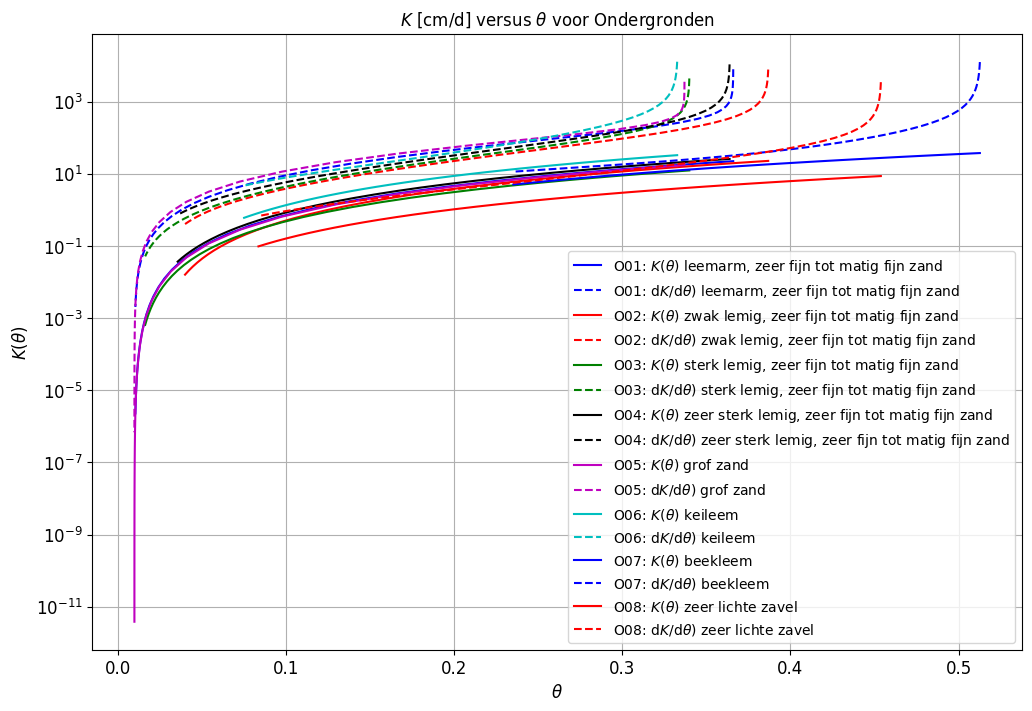

In [21]:
# %% K(theta) and dK/dtheta

for BO in ['Bovengronden', 'Ondergronden']:
    clrs = cycle('brgkmc')

    title=fr"$K$ [cm/d] versus $\theta$ voor {BO}"
    ax = etc.newfig(title, r'$\theta$', r'$K(\theta)$',
                yscale='log') #, ylim=(1e-7, 1e0))

    soil_codes = [c for c in sNL.Soil.data.index if c.startswith(BO[0])]

    for i, code in enumerate(soil_codes):
        if i == 8:
            break
        clr = next(clrs)
        soil = sNL.Soil(code)
        soil_nm = soil.props['Omschrijving']
        psi = soil.psispace()
        theta = soil.theta_fr_psi(psi)
        ax.plot(theta, soil.K_fr_theta(theta), '-', color=clr, label=fr"{code}: $K(\theta)$ {soil_nm}")
        ax.plot(theta, soil.dK_dtheta(theta), '--', color=clr, label=fr"{code}: d$K$/d$\theta)$ {soil_nm}")
    ax.legend(loc='lower right')

# Show throttle functions

Throttle functions can be used by the a root zone model to reduces effective ET when the root zone dries out.

Four functions can be used:

* According to Feddes (not smooth)
* A smooth function, essentially the same as Feddes, but differentiable
* A k-based function according to Mualem. (Declines too fast)
* A blend function between Feddes and Mualem.

All four function also reduce ET when the soil becomes too wet (psi < 25 cm)

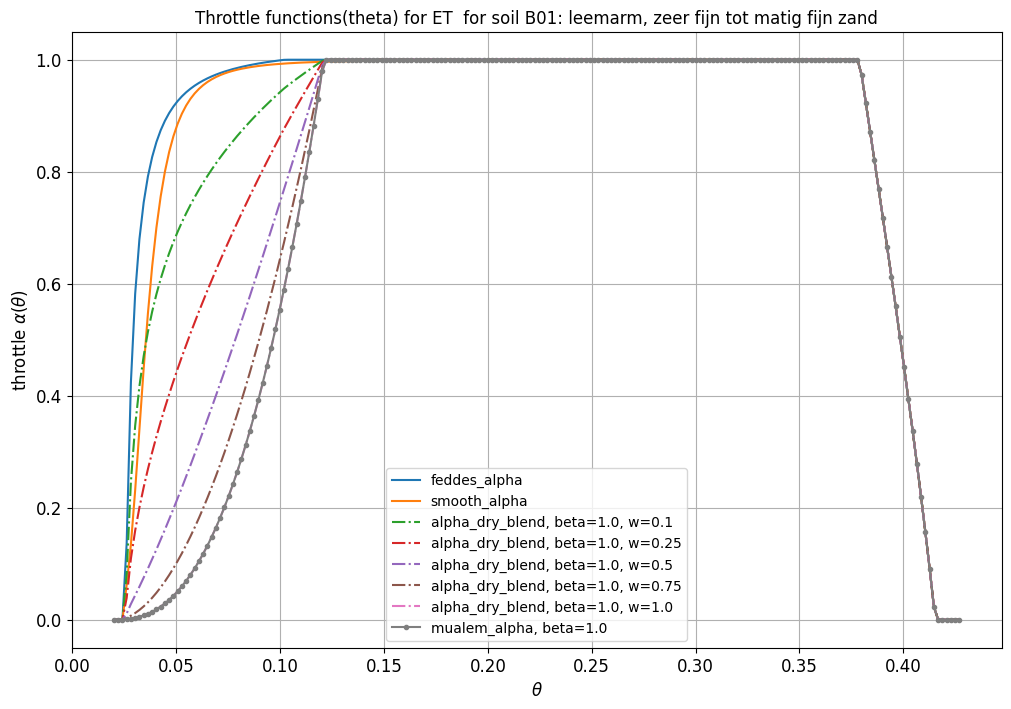

In [22]:

# %% Show the throttle function to throttle ET depending on theta
soil = sand_o
soil_nm = soil.props['Omschrijving']
title = f"Throttle functions(theta) for ET  for soil {soil.code}: {soil.props['Omschrijving']}"
ax = etc.newfig(title, r"$\theta$", r"throttle $\alpha(\theta)$")


theta = np.linspace(soil.props['theta_r'], soil.props['theta_s'], 200)

# ax.plot(theta, soil.alpha_wet(theta), label=r'alpha_wett')
ax.plot(theta, soil.feddes_alpha(theta), label='feddes_alpha')
ax.plot(theta, soil.smooth_alpha(theta), label='smooth_alpha')
beta = 1.0
for w in [0.1, 0.25, 0.5, 0.75, 1.0]:
    ax.plot(theta, soil.alpha_dry_blend(theta, beta=beta, w=w), '-.',
        label=f'alpha_dry_blend, beta={beta}, w={w}')
for beta in [1.0]:
        ax.plot(theta, soil.mualem_alpha(theta, beta=beta), '.-', label=f'mualem_alpha, beta={beta}')
ax.legend()
plt.show()

# Impulse resonses IR and IR_PIII

* The IR is the analytic impulse response.
* The IR_PIII the Pearson III impulse response (method of moments)

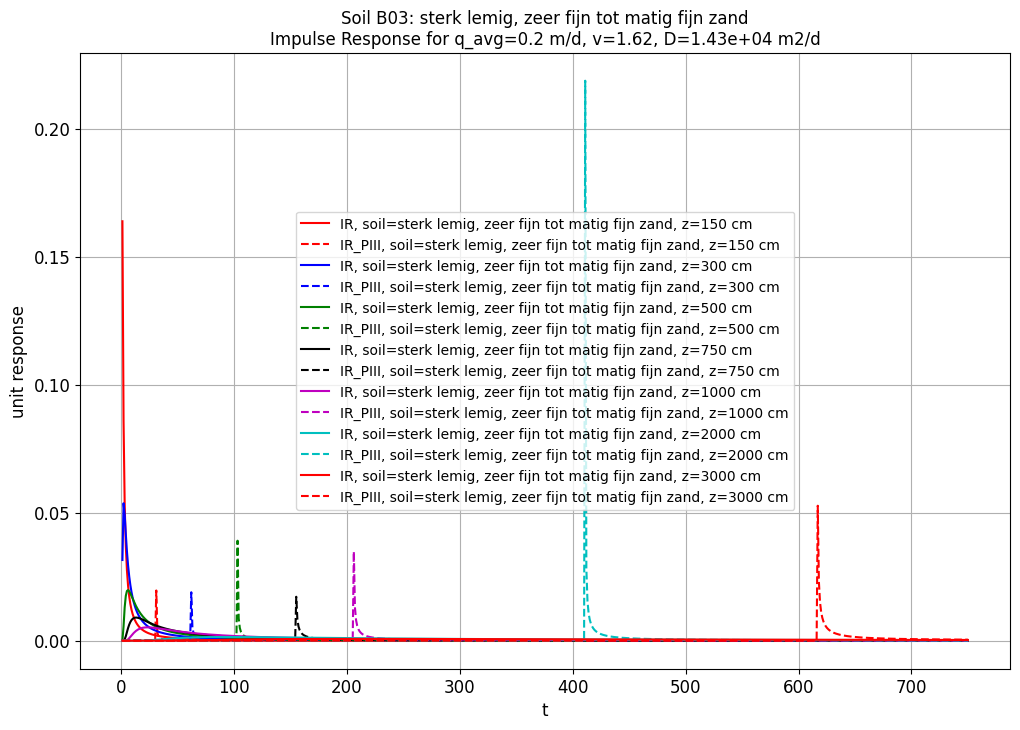

In [23]:
# %% Compute the Impulse Response

q_avg = .2 # cm/d
t = np.linspace(0, 750, 751)[1:]

soil = sNL.Soil("B03")
soil_nm = soil.props['Omschrijving']
v, D = soil.get_vD(q_avg)

ttl = f"Soil {soil.code}: {soil_nm}\n"
title = ttl + f"Impulse Response for q_avg={q_avg:.3g} m/d, v={v:.3g}, D={D:.3g} m2/d"
ax = etc.newfig(title, 't', 'unit response')

clrs = cycle('rbgkmc')
for z in [150, 300, 500, 750, 1000, 2000, 3000]: # z in cm
    clr = next(clrs)
    ax.plot(t, soil.IR(z, t, q_avg), '-', color=clr, label=f'IR, soil={soil_nm}, z={z:.0f} cm')
    ax.plot(t, soil.IR_PIII(z, t, q_avg), '--', color=clr, label=f'IR_PIII, soil={soil_nm}, z={z:.0f} cm')
ax.legend(loc='best')
# plt.show()

# Step resonses SR_phi, SR_erfc, SR_PIII

* SR_phi is exact solution using cumulative normal distributions
* SR_erfc is exact solution using erfc and exp functions
* SR_PIII is integration of the Pearson III impulse response (method of moments)

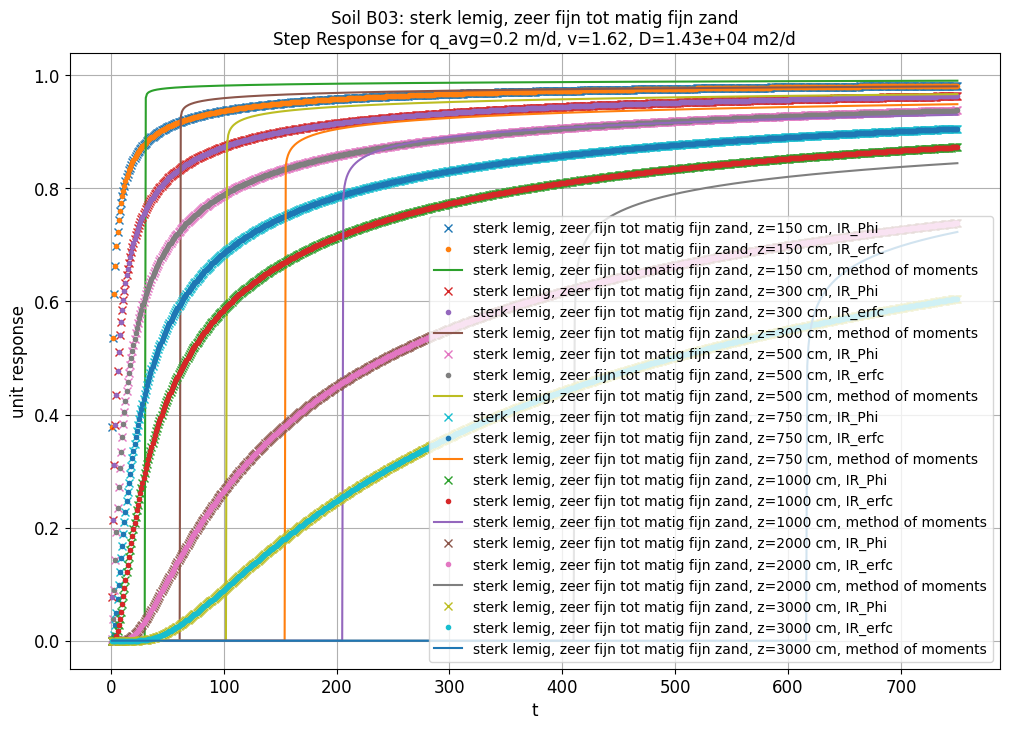

In [24]:
# %% Compute the analytic Step Response

q_avg = .2 # cm/d
t = np.linspace(0, 750, 751)[1:]

soil = sNL.Soil("B03")  # Sand
soil_nm = soil.props['Omschrijving']

ttl = f"Soil {soil.code}: {soil_nm}\n"
title = ttl + f"Step Response for q_avg={q_avg:.3g} m/d, v={v:.3g}, D={D:.3g} m2/d"
ax = etc.newfig(title, 't', 'unit response')

clrs = cycle('rbgkmc')
for z in [150, 300, 500, 750, 1000, 2000, 3000]: # z in cm
    clr = next(clrs)
    ax.plot(t, soil.SR_Phi(z, t, q_avg), 'x', label=f'{soil_nm}, z={z:.0f} cm, IR_Phi')
    ax.plot(t, soil.SR_erfc(z, t, q_avg), '.', label=f'{soil_nm}, z={z:.0f} cm, IR_erfc')
    ax.plot(t, soil.SR_PIII(z, t, q_avg), label=f'{soil_nm}, z={z:.0f} cm, method of moments')
        
ax.legend(loc='best')
# plt.show()

# BLock resonses ($d\tau = 1$ d) BR_phi, BR_erfc, BR_PIII

* BR_phi is exact solution using cumulative normal distributions
* BR_erfc is exact solution using erfc and exp functions
* BR_PIII is integration of the Pearson III impuls response (method of moments)

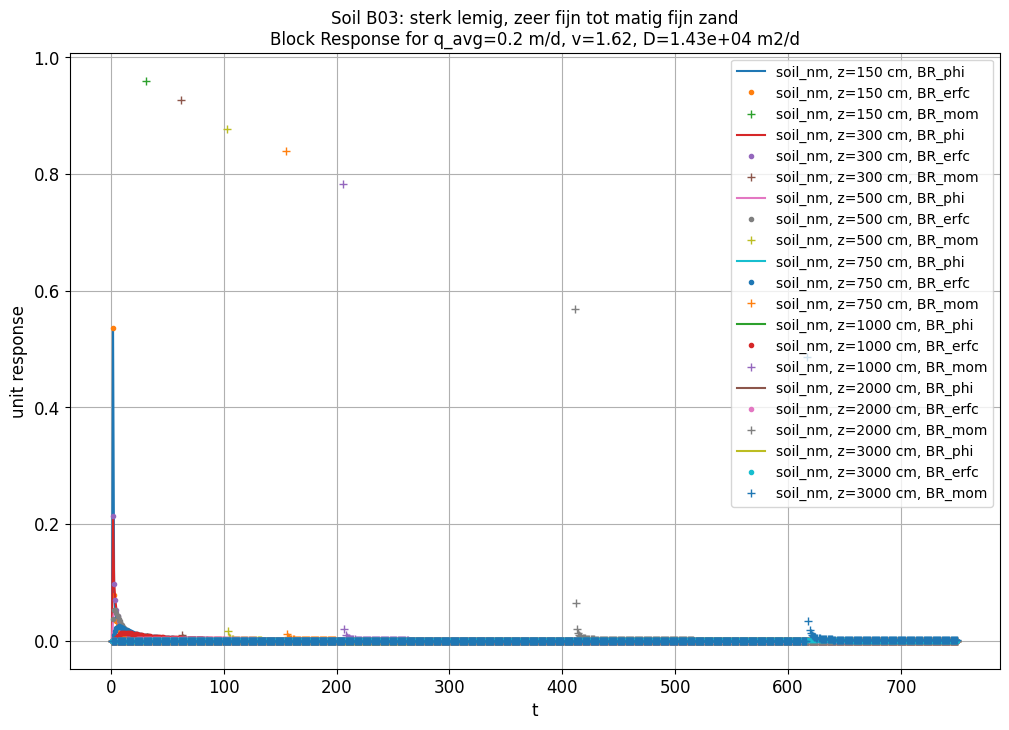

In [25]:
# %% Compute the Block Response

q_avg = 0.2 # cm/d
t = np.linspace(0, 750, 751)[1:]

soil = sNL.Soil("B03")
soil_nm = soil.props['Omschrijving']
v, D = soil.get_vD(q_avg)

ttl = f"Soil {soil.code}: {soil_nm}\n"
title = ttl + f"Block Response for q_avg={q_avg:.3g} m/d, v={v:.3g}, D={D:.3g} m2/d"
ax = etc.newfig(title, 't', 'unit response')

clrs = cycle('rbgkmc')
for z in [150, 300, 500, 750, 1000, 2000, 3000]: # z in cm
    clr = next(clrs)
    for soil_nm in ['sand']:
        ax.plot(t, soil.BR(soil.SR_Phi, z, t, q_avg),  '-', label=f'soil_nm, z={z:.0f} cm, BR_phi')
        ax.plot(t, soil.BR(soil.SR_erfc, z, t, q_avg), '.', label=f'soil_nm, z={z:.0f} cm, BR_erfc')                         
        ax.plot(t, soil.BR(soil.SR_PIII, z, t, q_avg), '+', label=f'soil_nm, z={z:.0f} cm, BR_mom')
        
ax.legend(loc='best')
plt.show()
